In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Dispositivo atual: {device}')

Dispositivo atual: cuda


In [3]:
train_csv = pd.read_csv('playground_data/train_balanced_ready.csv')

In [59]:
X = train_csv[['num_lanes','curvature','speed_limit','num_reported_accidents']]
#X = train_csv[['road_type','num_lanes','curvature','speed_limit','lighting','weather','road_signs_present','public_road','num_reported_accidents']]
y = train_csv['accident_risk']
#reduced train-test for quicker testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
#reduced train-test for quicker testing
print(X_train[:5000].shape, X_test[:1000].shape, y_train[:5000].shape, y_test[:1000].shape)
X_train = X_train[:1000]
X_test = X_test[:200]
y_train = y_train[:1000]
y_test = y_test[:200]
X_train.head()

(5000, 4) (1000, 4) (5000,) (1000,)


,num_lanes,curvature,speed_limit,num_reported_accidents
193237,1,0.36,25,1
76682,4,0.76,60,0
327051,3,0.54,60,1
264369,3,0.04,25,2
233944,4,0.73,45,0


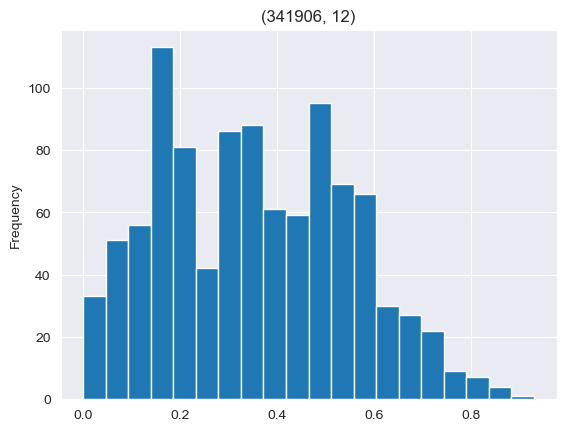

In [30]:
temp = X_train.copy()
temp['classification'] = y_train.copy()
p_1 = temp['classification'].plot(kind='hist',bins=20, title= str(train_csv.shape))
plt.show()

In [41]:
class MLP_4(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_4, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)



    def forward(self, x):
        x = self.hidden_layer(x)
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        x = self.output_layer(x)
        #x = self.relu(x)
        return x

In [60]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

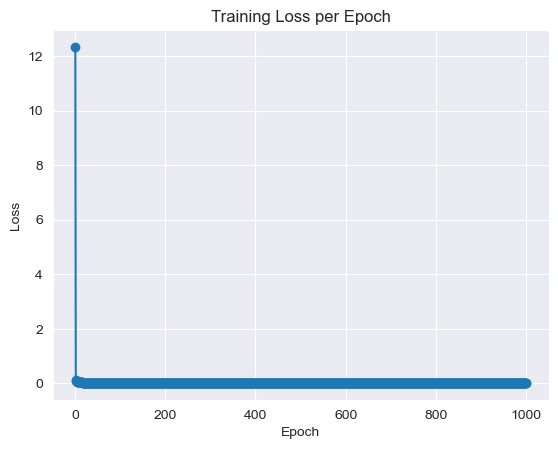

In [61]:
model = MLP_4(4,2).to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# Treinamento
epochs = 1000
epoch_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_dataloader)
    epoch_losses.append(avg_loss)

# Plot training loss per epoch
plt.figure()
plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.show()

Mean Absolute Error: 0.16441290080547333
Mean Squared Error: 0.038060612976551056
Root Mean Squared Error: 0.19509129226207733
R^2 Score: -0.0005145072937011719


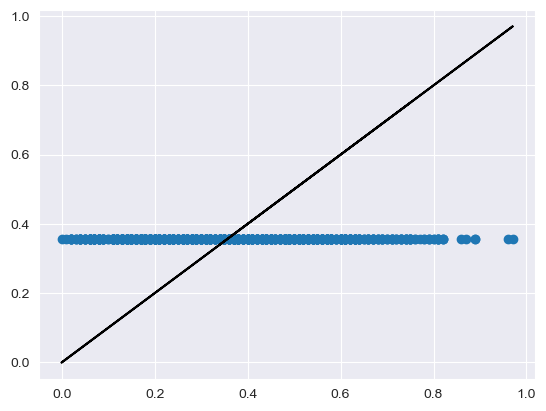

In [58]:

with torch.no_grad():
    outputs = model(X_train.to(device)).to(device)
outputs = outputs.cpu().numpy()
mae = mean_absolute_error(y_train, outputs)
mse = mean_squared_error(y_train, outputs)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, outputs)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

plt.scatter(y_train, outputs)
plt.plot(y_train, y_train, 'k')
#plt.title(f'RMSE = {np.sqrt(criterion(outputs, y_train)):.2f}')
plt.show()

In [25]:
y_true

[0.62,
 0.28,
 0.81,
 0.16,
 0.27,
 0.2,
 0.1,
 0.36,
 0.51,
 0.39,
 0.31,
 0.4,
 0.26,
 0.17,
 0.91,
 0.57,
 0.61,
 0.05,
 0.08,
 0.5,
 0.8,
 0.41,
 0.44,
 0.64,
 0.13,
 0.25,
 0.66,
 0.14,
 0.47,
 0.3,
 0.46,
 0.34,
 0.61,
 0.36,
 0.2,
 0.61,
 0.54,
 0.18,
 0.07,
 0.05,
 0.53,
 0.39,
 0.18,
 0.45,
 0.28,
 0.14,
 0.22,
 0.71,
 0.56,
 0.44,
 0.7,
 0.28,
 0.54,
 0.29,
 0.72,
 0.29,
 0.37,
 0.5,
 0.56,
 0.24,
 0.28,
 0.37,
 0.21,
 0.84,
 0.45,
 0.13,
 0.48,
 0.24,
 0.14,
 0.15,
 0.37,
 0.52,
 0.57,
 0.51,
 0.57,
 0.19,
 0.44,
 0.24,
 0.62,
 0.17,
 0.09,
 0.48,
 0.6,
 0.4,
 0.2,
 0.32,
 0.68,
 0.37,
 0.07,
 0.48,
 0.49,
 0.09,
 0.74,
 0.46,
 0.6,
 0.69,
 0.13,
 0.61,
 0.5,
 0.09,
 0.12,
 0.31,
 0.55,
 0.78,
 0.39,
 0.26,
 0.17,
 0.36,
 0.32,
 0.69,
 0.24,
 0.54,
 0.53,
 0.25,
 0.27,
 0.14,
 0.44,
 0.48,
 0.01,
 0.16,
 0.38,
 0.35,
 0.51,
 0.23,
 0.64,
 0.19,
 0.21,
 0.12,
 0.69,
 0.39,
 0.08,
 0.4,
 0.11,
 0.6,
 0.69,
 0.28,
 0.65,
 0.25,
 0.14,
 0.7,
 0.86,
 0.47,
 0.62,
 0.86,
 0.42,
 0